# Intuicion bajo una red neuronal
Realmente las capas ocultas en el Perceptron no muestran mucho.
Hay unas redes que se llaman CNN (Convolutional Neural Networks)
donde la intuicion es mas facil. Por ejemplo los numeros se dibujan con rayas y circulos. Un videito corto que ayuda a entender un poco lo que esta detras de una red neuronal.
[Intuicion acerca de redes neuronales](https://www.youtube.com/watch?v=aircAruvnKk).


Tres graficas para complementar.




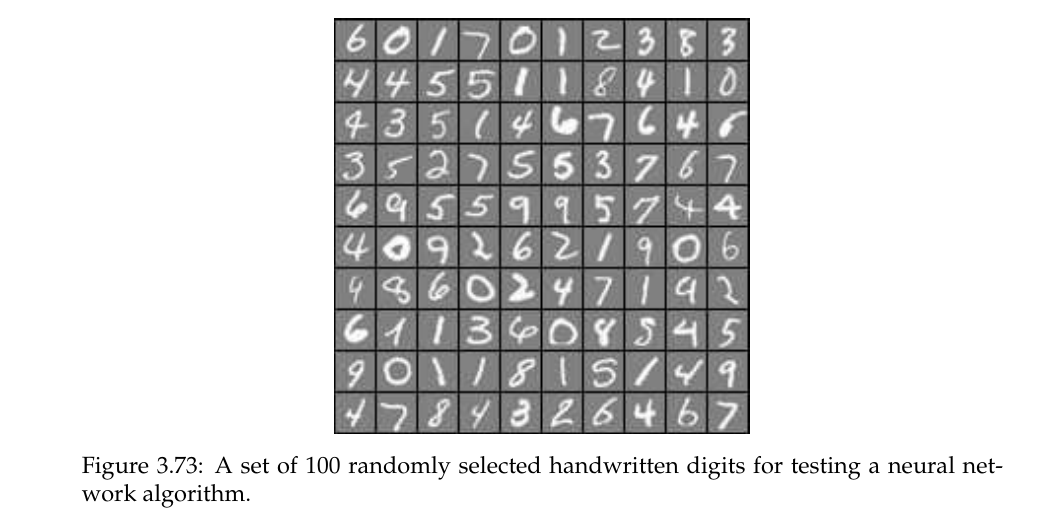

La figura 3.73 es la capa da entrada. Pensemos en solo 3 capas, entrada, oculta y salida.



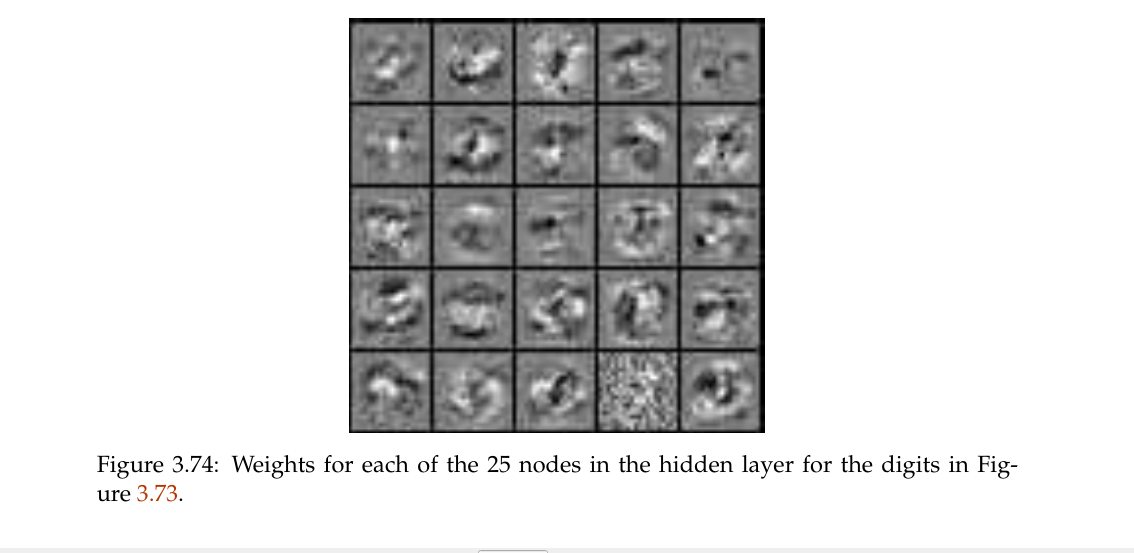

Esta es la capa oculta. No se ve entendible. Se ve como una "caja negra". Para ver los patrones de rayas y circulos se necesitan las redes CNN (Convolutional Neural Networks) estas las vemos en **deep learning**,o

Una figura final.



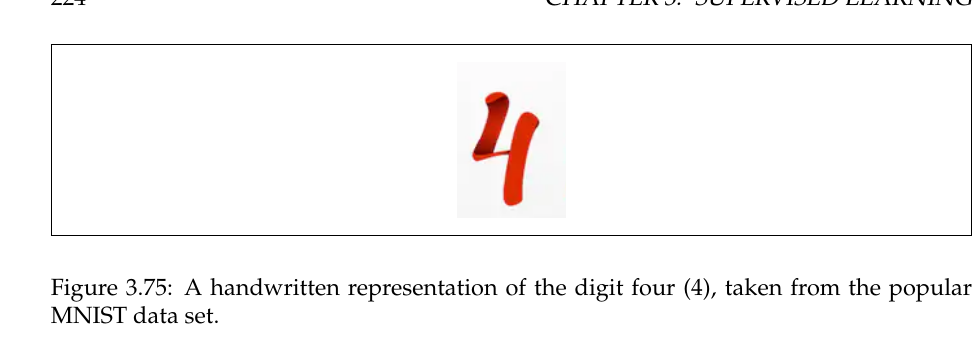

Las CNN si parten ese 4 en rayas.
Un ejemplo de una CNN corriendo en vivo es la de
[Stanford](https://cs231n.stanford.edu/2020/).




# Backpropagation:
## Historia:
* 1980s: Geoffrey Hinton (acaba de ganar el premio Nobel de fisica), junto otros Ronald Williams , David Rumelhart. Geoffrey de la universidad de Toronto en Canada.
* 1986s... Yan Lecun (el que administra la base de datos del MNIST). Yan Lecun y amigos desarrollaron la LeNet 5 que fue muy existosa para decifrar imagenes (entre ellas la del MNIST).
Combina Backpropagtion con CNN.




Para poder hacer propagacion hacia atras (backpropagation) se necesitan dos cosas:

1. Funcion de costo
2. El gradiente.

La ciencia del "update" esta en la ecuacion

$$\Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla_{\theta} J $$
donde $J=J(\Theta)$ es la funcion de costo.
Vamos a usar la funcion de costo logistica. Inicialmente para dos clases (binario) sabemos que

$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)}) \ + (1 - y_i) \log [ 1 - h(\theta , x^{(i)})] + \frac{\lambda}{2 m } \sum_{j=1}^n \theta_j^2 $$



Queremos hablar de multiclase $K>2$, entonces extendemos esta funcion de costo (existe otra llamada la **softmax**, se ve en el curso de deep learning). Aca usamos otra


$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)}
\log[ h_k(\Theta, x^{(i)})] + (1 - y^{(k)}) \log[ 1 -
h_k(\Theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{l=1}^L \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)})^2 $$




Ya tenemos la funcion de costo. Para hacer "backpropagation" necesitamos el gradiente.

Cual es el proceso:

1. Propagar hacia adelante (clase anterior) hasta la ultima capa.
2. Una vez en la ultima capa se halla el gradiente con respecto a los ultimos parametros $\Theta^{(L)}$ y nos devolvemos hacia la primera capa calculando gradientes a medida que avancemos (hacia atras).


Asumamos 1 capa de entrada $X$, $L$ capas ocultas y una de salida.
1. Propagacion hacia adelante.

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S( X \Theta^{(1)})  \\
A^{(3)} &=& S(Z^{(3)}) = S( A^{(2)} \Theta^{(2)})  \\
&\vdots& \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)} \\
A^{(L)} &=& S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta , X) &=& A^{(L+1)} = S(Z^{(L+1)} = S(A^{(L)} \Theta^{(L)}).
\end{eqnarray}

Ya estamos en este momento en la ultima capa. Tengamos en cuenta


$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)}   \right ) = S_{ij} = A_{ij}^{(L+1)} $$

Vamos a comenzar con la funcion de costo no regularizada

$$J(\theta) = -\frac1m \sum_{i=1}^m \sum_{j=1}^K y_{ij} \log[
    h_{ij}(\theta, x^{(i)})] \ + (1 - y_{ij}) \log [ 1 -
    h_{ij}(\theta , x^{(i)})] $$


Scacamos el gradiente. Recuerden que el gradiente de la sigmoid (logistics) es

$$S'(t) = S(t) (1 - S(t)) $$

\require{cancel}

\cancel{a}




Comenzamos con las primeras derivadas parciales.

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}
&=& -\frac1m \sum_i \sum_j  y_{ij} \frac{S_{ij}(1 - S_{ij})}{S_{ij}} \left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right ) + \frac1m  \sum_i \sum_j (1 - y_{ij}) \frac{S_{ij}(1 - S_{ij})}{1 -S_{ij}} \left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right ) \\
&=&  \frac1m  \sum_i -y_{iq} (1 - S_{iq}) A_{ip}^{(L)} +
(1 - y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=& \frac1m  \sum_i -y_{iq} A_{ip}^{(L)} + y_{iq} S_{iq} A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{iq} S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i (S_{iq} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m \sum_i ( A_{iq}^{(L+1)} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)})^T_p ( A^{(L+1)} - Y)_q
\end{eqnarray}

En resumen encontramos que


$$\left ( \frac{\partial J(\Theta, X)}{\partial \Theta^{(L)}} \right ) = \frac1m \left ( (A^{(L)})^T ( A^{(L+1)} - Y)  \right )_{pq} $$

Ese es el gradiente en la ultima capa. Debemos devolvernos a capas anteriores.
Para esto tengamos en cuenta que

$$h_{ij}(\Theta , X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)}  \right )  = A_{ij}^{(L+1)}$$

Vamos a tomar la derviada de la funcion log.

\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& \frac{1}{S_{ij}} S_{ij}(1 - S_{ij}) \sum_k
\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L)}}
\Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)}
\end{eqnarray}
Para calcular la derivada dentro de la suma tenemos en cuenta
llamando $S=A^{(L)}$,

$$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} = S_{ik}(1 - S_{ik}) \sum_r A_{ir}^{(L-1} \delta_{rp} \delta_{kq} =  A_{ik}^{(L)} ( 1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}$$

Entonces

\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{((L+1)}) A_{ik}^{(L)}\sum_k  ( 1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{((L+1)}) A_{ik}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{kj}^{(L)} \\
\end{eqnarray}

De la misma formao
\begin{eqnarray}
\frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{1}{1 - S_{ij}} S_{ij}(1 - S_{ij}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)} \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)} \left ( A_{iq}^{(L)}(1 - A_{iq}^{(L)})A_{ip}^{(L-1)} \theta_{qj}^{(L)} \right )
\end{eqnarray}

